Starting Sonic Cluster Analysis...
Step 1: Loading and preparing data...
Step 2: Finding optimal number of clusters using the Elbow Method...
 -> Saved 'elbow_method_plot.png'
 -> Optimal k selected: 6
Step 3: Applying K-Means with k=6...
Step 4: Analyzing cluster profiles...

--- Sonic Cluster Profiles ---
Each row represents the average 'sonic identity' of a cluster.
         acousticness  danceability    energy  instrumentalness  liveness  \
cluster                                                                     
0            0.811929      0.449985  0.260358          0.047538  0.193346   
1            0.254386      0.722508  0.658323          0.069323  0.174357   
2            0.133086      0.509512  0.780206          0.074581  0.253173   
3            0.795599      0.562235  0.665853          0.001095  0.732798   
4            0.840471      0.297416  0.171240          0.811599  0.140683   
5            0.133753      0.557295  0.681237          0.125016  0.203790   

          l

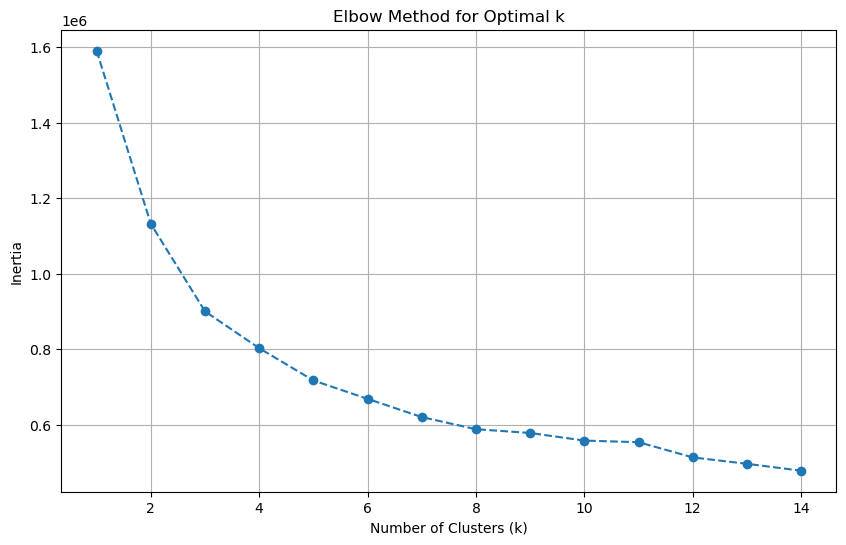

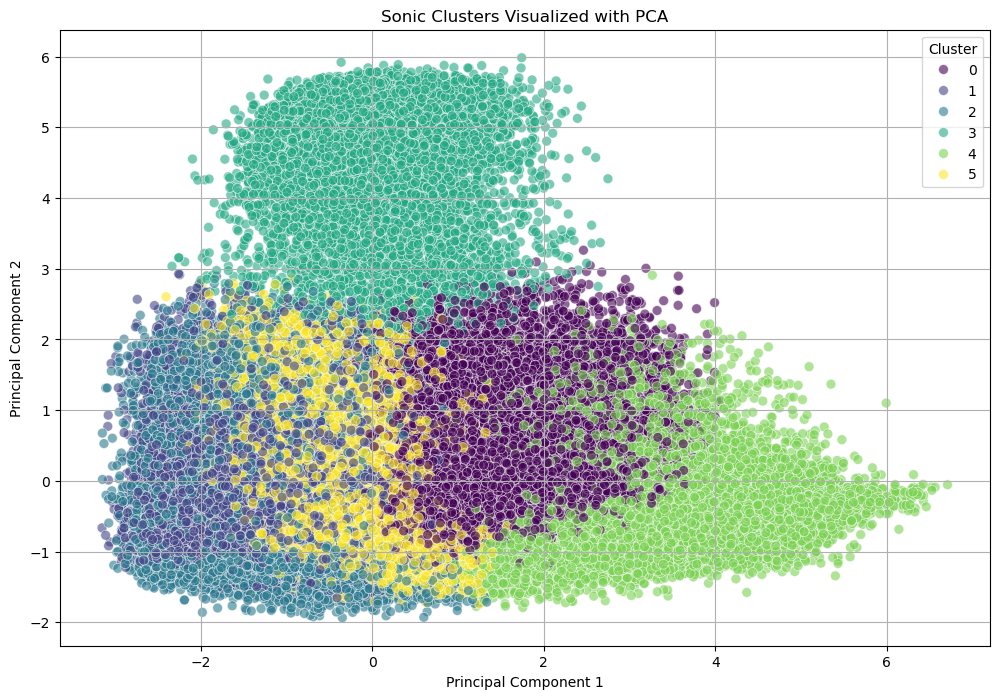

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

def sonic_cluster_analysis():
    """
    Performs a complete unsupervised learning analysis on the Spotify dataset
    to discover, analyze, and visualize sonic clusters.
    """
    print("Starting Sonic Cluster Analysis...")

    # --- 1. Load and Prepare the Data ---
    print("Step 1: Loading and preparing data...")
    df = pd.read_csv('Spotify Data.csv')
    df.drop_duplicates(subset=['track_id'], inplace=True, keep='first')
    df.reset_index(drop=True, inplace=True)

    features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
    x = df[features]

    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    
    # --- 2. Find the Optimal Number of Clusters (Elbow Method) ---
    print("Step 2: Finding optimal number of clusters using the Elbow Method...")
    inertia = []
    k_range = range(1, 15)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(x_scaled)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.savefig('elbow_method_plot.png')
    print(" -> Saved 'elbow_method_plot.png'")
    # From the plot, we'll choose k=6 as the "elbow" point.

    optimal_k = 6
    print(f" -> Optimal k selected: {optimal_k}")

    # --- 3. Apply K-Means Clustering ---
    print(f"Step 3: Applying K-Means with k={optimal_k}...")
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
    df['cluster'] = kmeans.fit_predict(x_scaled)

    # --- 4. Analyze the Cluster Profiles ---
    print("Step 4: Analyzing cluster profiles...")
    cluster_profiles = df.groupby('cluster')[features].mean()
    
    # Add cluster size to the profiles
    cluster_profiles['size'] = df['cluster'].value_counts()
    
    print("\n--- Sonic Cluster Profiles ---")
    print("Each row represents the average 'sonic identity' of a cluster.")
    print(cluster_profiles)

    # --- 5. Visualize the Clusters with PCA ---
    print("\nStep 5: Visualizing clusters with PCA...")
    pca = PCA(n_components=2)
    x_pca = pca.fit_transform(x_scaled)
    df_pca = pd.DataFrame(data=x_pca, columns=['principal_component_1', 'principal_component_2'])
    df_pca['cluster'] = df['cluster']

    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        x='principal_component_1', 
        y='principal_component_2',
        hue='cluster',
        data=df_pca,
        palette='viridis',
        alpha=0.6,
        s=50
    )
    plt.title('Sonic Clusters Visualized with PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.savefig('sonic_clusters_pca.png')
    print(" -> Saved 'sonic_clusters_pca.png'")

    print("\nAnalysis complete.")

if __name__ == '__main__':
    sonic_cluster_analysis()
